In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

# Exploration

In this notebook we will look at each category of data and how they corelate to the home team winning. To start, I will import the cleaned data table

In [3]:
## loading dataset
games = pd.read_pickle(os.path.join('Data','final_games.pkl'))
games.head()

,HOME_TEAM_ABBREV,AWAY_TEAM_ABBREV,SEASON,HOME_RECORD,ROAD_RECORD,HOME_TEAM_WINS,OFF_HOME_TEAM,DEF_HOME_TEAM,REB_HOME_TEAM,OFF_AWAY_TEAM,...,REB_AWAY_TEAM,OFF_HOME_RATING,DEF_HOME_RATING,REB_HOME_RATING,OFF_AWAY_RATING,DEF_AWAY_RATING,REB_AWAY_RATING,OFFENSE_DIFFERENCE,DEFENSE_DIFFERENCE,REBOUND_DIFFERENCE
0,CHA,MIL,2019,-10,20,0,"[31.006061923099047, 38.54431945273706, 32.704...","[22.10810810810811, 28.81081081081081, 22.2162...","[23.308831973407106, 31.182094864883947, 35.85...","[35.22876717660929, 65.69235449876932, 37.7094...",...,"[17.28106695654748, 58.916993867334874, 24.020...",33.477084,20.021622,26.029330,39.084703,26.043243,26.156013,-5.607619,-6.021622,-0.126683
1,MIN,DAL,2019,-15,11,0,"[31.63000087955722, 24.95066073256286, 31.9678...","[29.405405405405403, 5.351351351351353, 21.459...","[17.25898881532161, 13.456670998027207, 24.888...","[41.62244146926659, 29.710952103096684, 48.975...",...,"[22.37412606063427, 21.685969263523607, 38.388...",35.712786,20.486486,23.266696,36.429985,20.762162,21.562970,-0.717199,-0.275676,1.703727
2,LAC,PHI,2019,19,-13,1,"[44.03598551522123, 37.12656298881634, 28.6805...","[53.513513513513516, 14.702702702702705, 8.054...","[26.533392671106416, 30.47002411684483, 18.105...","[25.93974282213501, 42.6812218695769, 44.48622...",...,"[9.964396462598044, 30.33662390755899, 42.5476...",40.421789,25.940541,25.653422,34.188720,22.178378,21.569685,6.233069,3.762162,4.083737
3,DEN,TOR,2019,17,10,1,"[43.82752587784179, 32.27739138834381, 54.2482...","[28.108108108108105, 21.513513513513516, 34.81...","[29.068883152536877, 24.15430293073206, 63.988...","[27.52057045795501, 34.03891798056395, 45.9075...",...,"[14.924055357398997, 26.57847134410255, 40.123...",36.647265,22.421622,24.336735,33.382946,19.313514,19.538902,3.264319,3.108108,4.797833
4,SAC,DET,2019,-2,-13,1,"[45.720084398700706, 29.937134564603657, 36.76...","[14.702702702702705, 16.702702702702705, 15.40...","[34.7626909366028, 23.82034569793837, 23.35391...","[27.664451648755787, 32.20682601470979, 37.932...",...,"[10.074796140113614, 23.019953413609556, 41.90...",39.696424,22.264865,25.286163,30.492550,15.410811,17.782184,9.203875,6.854054,7.503980


## Season

The Year of the season does not seem to affect home team wins that much; we only see a drastic drop during 2019 because the NBA Season was canceled due to COVID 19. Therfore, it seems that Year won't be a helpful predictor for winning.

In [4]:
games.groupby('SEASON')['HOME_TEAM_WINS'].sum()

SEASON
2015    841
2016    816
2017    805
2018    810
2019    528
Name: HOME_TEAM_WINS, dtype: int64

Text(0.5, 1.0, 'Total Home Wins Per Season')

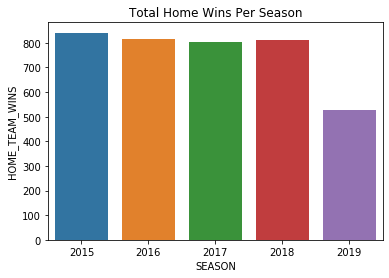

In [5]:
## wins per season
sns.barplot(games.SEASON,games.groupby('SEASON')['HOME_TEAM_WINS'].transform('sum'))
plt.title('Total Home Wins Per Season')

## Home/Road Record

Looking at Home/Road plus-minus counts, we see that most home wins are highly concentrated near zero, but the explanation for that is more games are played when records are even (Ex. 0-0) because all teams start with a 0-0 record and teams are pretty likely to have even records like 3-3 early on in the season and even later. However I do see signifigance in these two variables, since it seems that for Home Record, there is more home wins when the record is positive and less when it is negative. This makes sense because better teams have posittive records, and thus we should expect more wins. For Road Record, we see the exact opposite where there is more home wins when the road record's plus-minus is negative. Again, this makes sense because weaker road teams should lose more and thus we should expect to see more home records.

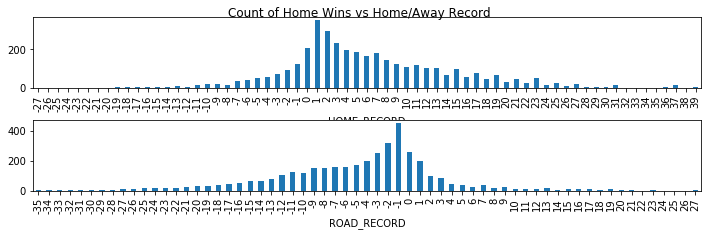

In [6]:
plt.subplots(2,1,figsize=(10,3))
plt.tight_layout()
count = 0

## making barplot per home/away record
for item in ['HOME_RECORD', 'ROAD_RECORD']:
    count += 1
    plt.subplot(2,1,count)
    games.groupby(item)['HOME_TEAM_WINS'].sum().plot(kind = 'bar')
plt.suptitle('Count of Home Wins vs Home/Away Record')
plt.show()

## Home/Away Team Abbreviation

Looking at the barplots across teams, it seems that we see that across teams, home wins vary depending on the year and what team it is. Take for example, Golden State Warriors which saw a huge drop in home wins from 2018 to 2019. The explaination for this was Curry, Klay, and Draymond were injured for most of season and KD and Andre left the team. However, these drastic drops in wins are due to players leaving/ being injured rather than the team so I'm convinced that these are not a good feature to use in model

In [7]:
counts = games.groupby(['HOME_TEAM_ABBREV','SEASON'])['HOME_TEAM_WINS'].sum()

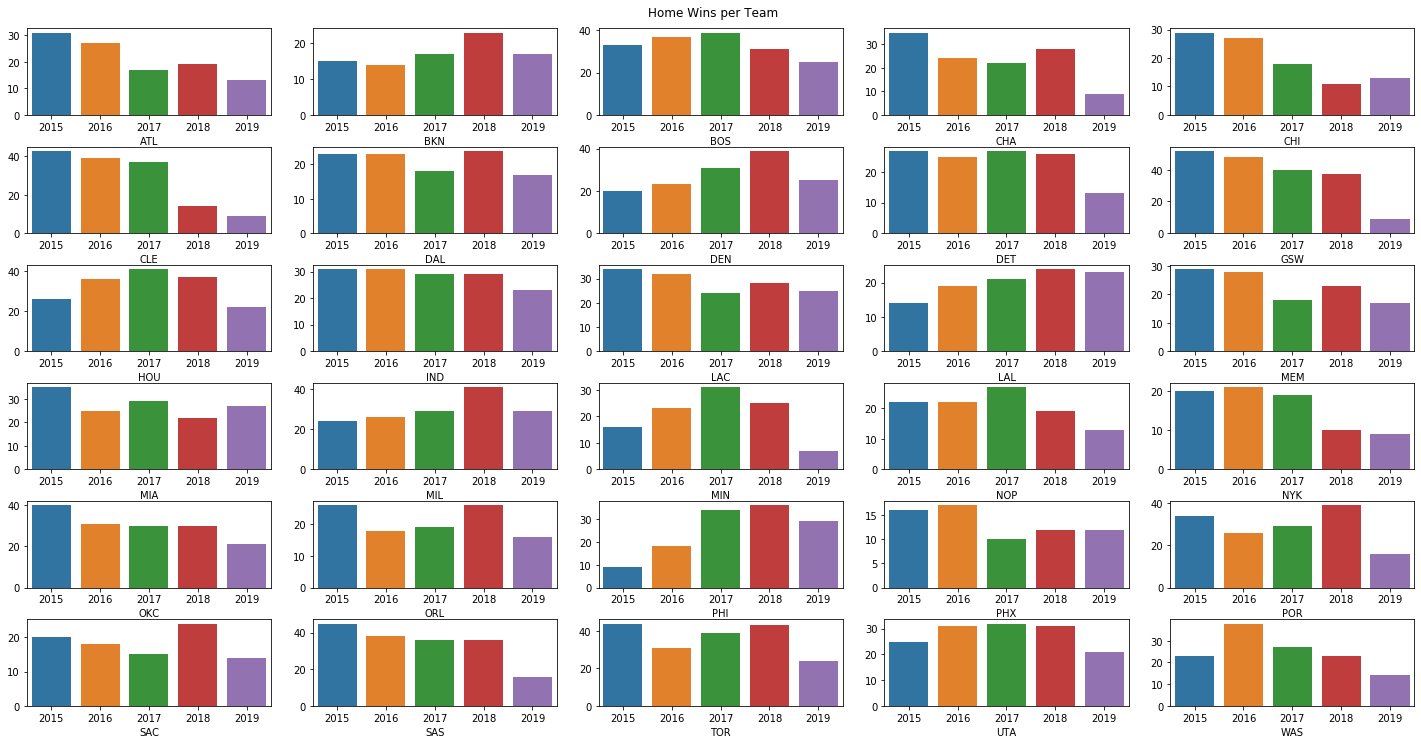

In [8]:
plt.subplots(6,5, figsize = (20,10))
plt.tight_layout()
count = 0

## making barplot per team
for i in counts.index.get_level_values(0).unique():
    count += 1
    plt.subplot(6,5,count)
    sns.barplot(counts[i].index, counts[i].values)
    plt.xlabel(i)
plt.suptitle('Home Wins per Team', y = 1.01)
plt.show()

## Offense Rating

Looking at the boxplots below the signifigant thing I see is that for offensive ratings of home teams, the median offensive rating if the team wins is higher than the mean offensive rating if the team loses(depicted by the second boxplot). We see a inverse relationship for away team ratings where a higher rating for away teams means the hometeam loses. This is to be expected because the better offensive team usually wins. However if you look at my groupby function, it seems that the difference actually doesn't equate to much, leading me to believe that offense doesn't actually matter for winning. However let's explore more.

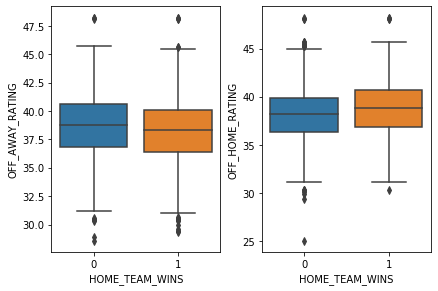

In [9]:
plt.subplots(1,2)
plt.tight_layout()

##making boxplots
plt.subplot(1,2,1)
sns.boxplot(games['HOME_TEAM_WINS'], games['OFF_AWAY_RATING'])
plt.subplot(1,2,2)
sns.boxplot(games['HOME_TEAM_WINS'], games['OFF_HOME_RATING'])

In [10]:
games.groupby('HOME_TEAM_WINS').agg({'OFF_AWAY_RATING':['median', 'mean'], 'OFF_HOME_RATING': ['median', 'mean']})

OFF_AWAY_RATING            OFF_HOME_RATING           
                        median       mean          median       mean
HOME_TEAM_WINS                                                      
0                    38.752589  38.704628       38.174678  38.201506
1                    38.299780  38.272388       38.797358  38.738273

Further exploring, I created a column to get the difference in offensive rating between home and away teams to see if there was a signifigant difference in offensive ratings when a home team won. I observed a fairly signifigant increase in means and a higher meadian.  I have concluded based on this data that having a better offense doesn't seem to change the outcome of a match, but more tests needs to be ran.

In [11]:
## creating new column
games['OFFENSE_DIFFERENCE'] = games['OFF_HOME_RATING'] - games['OFF_AWAY_RATING']

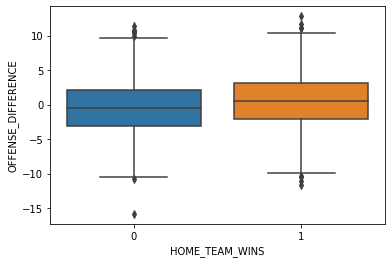

In [12]:
sns.boxplot(games['HOME_TEAM_WINS'], games['OFFENSE_DIFFERENCE'])

In [13]:
games.groupby('HOME_TEAM_WINS')['OFFENSE_DIFFERENCE'].mean()

HOME_TEAM_WINS
0   -0.503122
1    0.465885
Name: OFFENSE_DIFFERENCE, dtype: float64

## Defense Rating

Defense seems to be a whole new story as shown in my groupby data frame. The boxplot and dataframe show that home teams who won seem to have a higher defensive rating, vice versa away teams who lost seem to have a lower defensive rating than the home team

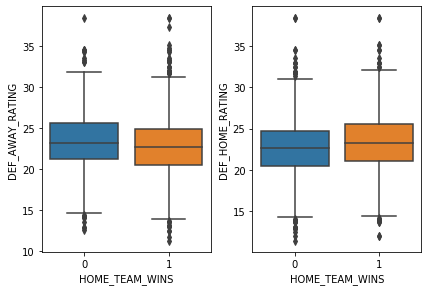

In [14]:
plt.subplots(1,2)
plt.tight_layout()

##making boxplots
plt.subplot(1,2,1)
sns.boxplot(games['HOME_TEAM_WINS'], games['DEF_AWAY_RATING'])
plt.subplot(1,2,2)
sns.boxplot(games['HOME_TEAM_WINS'], games['DEF_HOME_RATING'])

In [15]:
games.groupby('HOME_TEAM_WINS').agg({'DEF_AWAY_RATING':['median', 'mean'], 'DEF_HOME_RATING': ['median', 'mean']})

DEF_AWAY_RATING            DEF_HOME_RATING           
                        median       mean          median       mean
HOME_TEAM_WINS                                                      
0                    23.248649  23.411352       22.691892  22.683406
1                    22.681081  22.674432       23.210811  23.334550

Creating the same difference columns , we see a signficant decrease of defensive ratings when a home team wins

In [16]:
## creating new column
games['DEFENSE_DIFFERENCE'] = games['DEF_HOME_RATING'] - games['DEF_AWAY_RATING']

In [17]:
games.groupby('HOME_TEAM_WINS')['DEFENSE_DIFFERENCE'].mean()

HOME_TEAM_WINS
0   -0.727946
1    0.660118
Name: DEFENSE_DIFFERENCE, dtype: float64

## Rebounding

Data shows for rebounding doesn't seem to affect the outcome of a home team winning as much, since both have similar mean/medians. However, we do see a slight increase meaning that it doesn't entirely not matter but it seems to have as much singifigance as offensive rating.

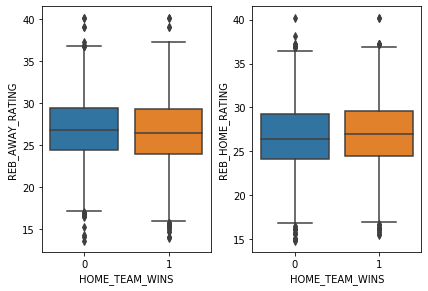

In [18]:
plt.subplots(1,2)
plt.tight_layout()

##making boxplots
plt.subplot(1,2,1)
sns.boxplot(games['HOME_TEAM_WINS'], games['REB_AWAY_RATING'])
plt.subplot(1,2,2)
sns.boxplot(games['HOME_TEAM_WINS'], games['REB_HOME_RATING'])

In [19]:
games.groupby('HOME_TEAM_WINS').agg({'REB_AWAY_RATING':['median', 'mean'], 'REB_HOME_RATING': ['median', 'mean']})

REB_AWAY_RATING            REB_HOME_RATING           
                        median       mean          median       mean
HOME_TEAM_WINS                                                      
0                    26.885472  26.991552       26.411999  26.673334
1                    26.422809  26.622947       26.969006  27.008956

Again we see a similar increase in mean difference of rebounding ratings.

In [20]:
## creating new column
games['REBOUND_DIFFERENCE'] = games['REB_HOME_RATING'] - games['REB_AWAY_RATING']

In [21]:
games.groupby('HOME_TEAM_WINS')['REBOUND_DIFFERENCE'].mean()

HOME_TEAM_WINS
0   -0.318218
1    0.386009
Name: REBOUND_DIFFERENCE, dtype: float64

## Scatterplots of Offense/Defense/Rebounding Difference

Below I made three scatterplots to see the relationship between each of my newly enginereed differences. Remember differences depict the difference of the ratings between the home and away team. Meaning if the home team has a offensive rating of 20 and the away team has an offensive rating of 10, the difference would be 10. As you can see, the scatter plots really only show positive relationships between each of the variables meaning, a higher offensive difference would also most likely mean a higher defensive difference. This is also saying that a good home team on offense would probably be a good team on defense (depicted by the slope). Looking at the legends of each of the scatterplots, we see no difference bwtween wins and losses, meaning their were th

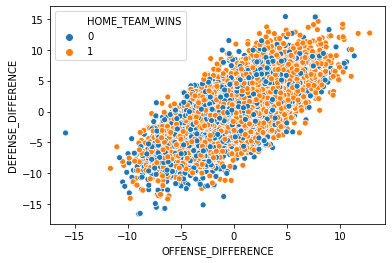

In [22]:
sns.scatterplot(games['OFFENSE_DIFFERENCE'], games['DEFENSE_DIFFERENCE'], hue = games['HOME_TEAM_WINS'])

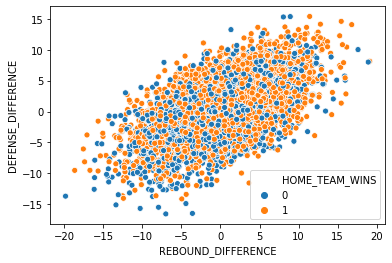

In [23]:
sns.scatterplot(games['REBOUND_DIFFERENCE'], games['DEFENSE_DIFFERENCE'], hue = games['HOME_TEAM_WINS'])

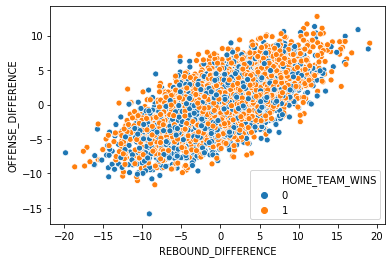

In [24]:
sns.scatterplot(games['REBOUND_DIFFERENCE'], games['OFFENSE_DIFFERENCE'], hue = games['HOME_TEAM_WINS'])